## Natural Language Processing with Disaster Tweet

## Import necessary library

In [28]:
import pandas as pd 
import re 
import string
from nltk.corpus import stopwords 
import numpy as np
import gensim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
tweet_train_data = pd.read_csv('train (2).csv')
tweet_train_data = tweet_train_data.drop(['keyword','location'],axis = 1)
tweet_train_data 

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...
7608,10869,Two giant cranes holding a bridge collapse int...,1
7609,10870,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,Police investigating after an e-bike collided ...,1


In [3]:
tweet_test_data = pd.read_csv('test (1).csv')
tweet_test_data = tweet_test_data.drop(['keyword','location'],axis = 1)
tweet_test_data 

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...
3258,10861,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,Storm in RI worse than last hurricane. My city...
3260,10868,Green Line derailment in Chicago http://t.co/U...
3261,10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [4]:
train_text = tweet_train_data[['text']]
test_text = tweet_test_data[['text']]
text_df = pd.concat([train_text,test_text],axis=0,ignore_index=True)
text_df 

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...
...,...
10871,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
10872,Storm in RI worse than last hurricane. My city...
10873,Green Line derailment in Chicago http://t.co/U...
10874,MEG issues Hazardous Weather Outlook (HWO) htt...


In [5]:
def remove_url(text):
    url = re.compile(r'https?://\s+|www\.\s+')
    return url.sub(r'',text)

def remove_html(text):
    html = re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    return re.sub(html, '', text)

In [6]:
text_df['text'] = text_df['text'].apply(lambda x: remove_url(x))
text_df['text'] = text_df['text'].apply(lambda x: remove_html(x))

In [7]:
text_df.head()

,text
0,Our Deeds are the Reason of this #earthquake M...
1,Forest fire near La Ronge Sask. Canada
2,All residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,Just got sent this photo from Ruby #Alaska as ...


In [8]:
text_df.shape

(10876, 1)

In [9]:
for i in range(0,10876):
    text_df['text'][i] = text_df['text'][i].lower()

In [10]:
text_df.head()

,text
0,our deeds are the reason of this #earthquake m...
1,forest fire near la ronge sask. canada
2,all residents asked to 'shelter in place' are ...
3,"13,000 people receive #wildfires evacuation or..."
4,just got sent this photo from ruby #alaska as ...


In [11]:
stop_words = set(stopwords.words('english'))
print(stopwords.words('english'))
stop_wordss = np.array(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [12]:
text_df['tokenizer_text'] = text_df['text'].apply(gensim.utils.simple_preprocess)
text_df.head()

,text,tokenizer_text
0,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, earth..."
1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...","[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, ala..."


In [13]:
def remove_stopwords(text_token):
    text_sort =[word for word in text_token if word not in stop_words]
    return text_sort

In [14]:
text_df['no_stopwords'] = text_df['tokenizer_text'].apply(lambda x: remove_stopwords(x))
text_df.head()

,text,tokenizer_text,no_stopwords
0,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...","[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order..."
4,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [15]:
final = [0]*10876
for i in range(0,10876):
    em_str = ' '
    re = text_df['no_stopwords'][i]
    final[i] = em_str.join(re)

In [16]:
text_df['fianl_txt'] = final
text_df

,text,tokenizer_text,no_stopwords,fianl_txt
0,our deeds are the reason of this #earthquake m...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deeds reason earthquake may allah forgive us
1,forest fire near la ronge sask. canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,all residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...","[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation orders cal...
4,just got sent this photo from ruby #alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfires pou...
...,...,...,...,...
10871,earthquake safety los angeles ûò safety faste...,"[earthquake, safety, los, angeles, ûò, safety,...","[earthquake, safety, los, angeles, ûò, safety,...",earthquake safety los angeles ûò safety fasten...
10872,storm in ri worse than last hurricane. my city...,"[storm, in, ri, worse, than, last, hurricane, ...","[storm, ri, worse, last, hurricane, city, othe...",storm ri worse last hurricane city others hard...
10873,green line derailment in chicago http://t.co/u...,"[green, line, derailment, in, chicago, http, c...","[green, line, derailment, chicago, http, co, u...",green line derailment chicago http co utbxlcbiuy
10874,meg issues hazardous weather outlook (hwo) htt...,"[meg, issues, hazardous, weather, outlook, hwo...","[meg, issues, hazardous, weather, outlook, hwo...",meg issues hazardous weather outlook hwo http ...


In [17]:
cv = CountVectorizer()
counts_vec = cv.fit_transform(text_df['fianl_txt'])

In [20]:
x = counts_vec[0:7613]
y = tweet_train_data.target

In [21]:
nb_model = MultinomialNB()
nb_model.fit(x,y)

MultinomialNB()

In [22]:
nb_pred_y = nb_model.predict(x)
print('Accurancy score nb_model :',accuracy_score(y,nb_pred_y))

Accurancy score nb_model : 0.9207933797451727


In [23]:
test_vec=counts_vec[7613:10877]

In [24]:
nb_pred_y_test = nb_model.predict(test_vec)
nb_pred_y_test 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [27]:
df = pd.DataFrame(nb_pred_y_test,columns=['target'])
df 

,target
0,1
1,1
2,1
3,1
4,1
...,...
3258,1
3259,1
3260,1
3261,1


<AxesSubplot:>

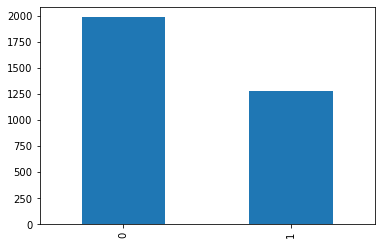

In [31]:
df['target'].value_counts().plot(kind = 'bar')

In [33]:
submission_file = pd.concat([tweet_test_data.id,df.target],axis=1)
submission_file

,id,target
0,0,1
1,2,1
2,3,1
3,9,1
4,11,1
...,...,...
3258,10861,1
3259,10865,1
3260,10868,1
3261,10874,1


In [34]:
submission_file.to_csv('submission_file',index=False)